In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task-02-car-price-prediction/test_car_details.csv
/kaggle/input/task-02-car-price-prediction/train_car_details.csv


---

In [2]:
df_train_raw = pd.read_csv('/kaggle/input/task-02-car-price-prediction/train_car_details.csv')
df_test_raw = pd.read_csv('/kaggle/input/task-02-car-price-prediction/test_car_details.csv')

df_train = df_train_raw.copy()
df_train.columns = df_train.columns.str.lower()

df_test = df_test_raw.copy()
df_test.columns = df_test.columns.str.lower()

# EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Funções auxiliares

In [4]:
def pprint_series(series: pd.Series, rounding: int = 3, ascending: bool = False):
    def print_header():
        print(f'col {" "*18} dtype', end='')
        for i in range(4):
            print(f'{" "*11} col {" "*18} dtype', end='')
        print('\n')
    
    def print_dtypes(series: pd.Series):
        c = 0
        for i, v in series.sort_values(ascending=ascending).items():
            if isinstance(v, float):
                v = round(v, rounding)
            if c <= 3:
                print(f'{i[:23]:<23}{v}', end='\t|\t')
                c += 1
                continue
            print(f'{i[:23]:<23}{v}')
            c = 0
            
    print_header()
    print_dtypes(series)

## Análise dos tipos e colunas

### Shape

In [5]:
_ = df_train.shape
print(f'{_[0]} linhas x {_[1]} colunas')

5689 linhas x 14 colunas


### Tipos

In [6]:
pprint_series(df_train.dtypes)

col                    dtype            col                    dtype            col                    dtype            col                    dtype            col                    dtype

name                   object	|	fuel                   object	|	seller_type            object	|	transmission           object	|	owner                  object
mileage                object	|	engine                 object	|	max_power              object	|	torque                 object	|	seats                  float64
id                     int64	|	year                   int64	|	selling_price          int64	|	km_driven              int64	|	

In [7]:
df_train.dtypes.value_counts()

object     9
int64      4
float64    1
dtype: int64

Das 14 colunas:
  - 9 são <i>object</i> (str)
  - 5 são numéricas

#### <i>Object</i>

In [8]:
df_train.select_dtypes(include=[object])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Hyundai Santro GLS I - Euro I,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
1,Maruti Ertiga VDI,Diesel,Individual,Manual,First Owner,20.77 kmpl,1248 CC,88.76 bhp,200Nm@ 1750rpm
2,BMW 3 Series 320d Luxury Line,Diesel,Dealer,Automatic,First Owner,19.62 kmpl,1995 CC,187.74 bhp,400Nm@ 1750-2500rpm
3,Tata New Safari DICOR 2.2 EX 4x2,Diesel,Individual,Manual,Third Owner,11.57 kmpl,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm
4,Toyota Fortuner 3.0 Diesel,Diesel,Individual,Manual,Second Owner,11.5 kmpl,2982 CC,171 bhp,343Nm@ 1400-3400rpm
...,...,...,...,...,...,...,...,...,...
5684,Hyundai Grand i10 Asta Option,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm
5685,Renault Duster 110PS Diesel RxL,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm
5686,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,Second Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm
5687,Maruti SX4 S Cross 2015-2017 DDiS 200 Alpha,Diesel,Dealer,Manual,First Owner,23.65 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm


Das 9 colunas <i>object</i>,
  - 5 são categóricas
  - 4 são, na verdade, numéricas, mas contém texto

#### Numéricas

In [9]:
df_train.select_dtypes(include=[np.number])

,id,year,selling_price,km_driven,seats
0,1,1999,80000,110000,NaN
1,2,2012,459999,87000,7.0
2,3,2010,1100000,102000,5.0
3,4,2009,229999,212000,7.0
4,5,2010,800000,125000,7.0
...,...,...,...,...,...
5684,5685,2017,550000,20000,5.0
5685,5686,2013,360000,81000,5.0
5686,5687,2011,310000,70000,5.0
5687,5688,2015,650000,57000,5.0


### Dados nulos/faltantes

In [10]:
pprint_series(df_train.isnull().sum())

col                    dtype            col                    dtype            col                    dtype            col                    dtype            col                    dtype

torque                 158	|	mileage                157	|	engine                 157	|	seats                  157	|	max_power              151
id                     0	|	name                   0	|	year                   0	|	selling_price          0	|	km_driven              0
fuel                   0	|	seller_type            0	|	transmission           0	|	owner                  0	|	

In [11]:
df_train[df_train.torque.isnull()]

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Hyundai Santro GLS I - Euro I,1999,80000,110000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
11,12,Fiat Punto 1.3 Emotion,2010,190000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
37,38,Hyundai Santro Xing XG,2006,72000,110000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
48,49,Toyota Etios Liva GD,2012,400000,107500,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
92,93,Maruti Zen Estilo VXI BSIV W ABS,2011,170000,55113,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,5487,Hyundai Santro Xing XL eRLX Euro II,2006,105000,60000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
5515,5516,Maruti Omni LPG STD BSIV,1999,70000,100000,LPG,Individual,Manual,Fourth & Above Owner,NaN,NaN,NaN,NaN,NaN
5572,5573,Hyundai Santro Xing XL,2007,90000,64000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
5611,5612,Hyundai Santro GLS I - Euro II,2007,150000,60000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN


In [12]:
null_count = df_train.torque.isnull().sum()
null_percentage = round((null_count / len(df_train)) * 100, 2)
print(f'Utilizando a coluna "torque" como base, temos {null_percentage}% de dados nulos ({null_count}/{len(df_train)}).')

Utilizando a coluna "torque" como base, temos 2.78% de dados nulos (158/5689).


## Análise estatística

In [13]:
df_stat = df_train.copy() 

### Conversão das colunas <i>object</i> numéricas em float64

In [14]:
display(df_stat[['mileage', 'engine', 'max_power', 'torque']])

def extract_obj_num_col(series: pd.Series, re_pattern: str):
    return series.str.extract(re_pattern).astype(np.float64)

try:
    df_stat['mileage'] = extract_obj_num_col(df_stat['mileage'], '(\d+.\d+)')
    df_stat['engine'] = extract_obj_num_col(df_stat['engine'], '(\d+.\d+)')
    df_stat['max_power'] = extract_obj_num_col(df_stat['max_power'], '(\d+.\d+)')

    # caso especial
    df_stat['torque'] = extract_obj_num_col(df_stat['torque'], '(\d+.\d+)')

except Exception as e:
    print('\n', e)


,mileage,engine,max_power,torque
0,NaN,NaN,NaN,NaN
1,20.77 kmpl,1248 CC,88.76 bhp,200Nm@ 1750rpm
2,19.62 kmpl,1995 CC,187.74 bhp,400Nm@ 1750-2500rpm
3,11.57 kmpl,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm
4,11.5 kmpl,2982 CC,171 bhp,343Nm@ 1400-3400rpm
...,...,...,...,...
5684,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm
5685,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm
5686,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm
5687,23.65 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm



 could not convert string to float: '3,800'


Parece que algum carro lá no meio tem um valor de torque fora do padrão

In [15]:
df_stat[df_stat['torque'].str.contains('3,800', na=False)]

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
15,16,Volkswagen Jetta 1.6 Trendline,2010,225000,80000,Petrol,Individual,Manual,Second Owner,14.0,1595.0,102.0,"15@ 3,800(kgm@ rpm)",5.0
197,198,Volkswagen Jetta 1.6 Trendline,2010,225000,80000,Petrol,Individual,Manual,Second Owner,14.0,1595.0,102.0,"15@ 3,800(kgm@ rpm)",5.0


Aí o bendito

#### Caso especial: 'torque'
    Conversão de unidades de 'kgm' para 'nm' 
$$ Nm = kgm * 9.80665 $$

In [16]:
df_stat['is_kgm'] = df_stat['torque'].str.lower() \
    .str.contains('kgm', na=False) \
    .map({False: 1, True: 9.80665})

df_stat['max_torque'] = extract_obj_num_col(df_stat['torque'], '(\d+[.\d]?)')
df_stat['max_torque'] *= df_stat['is_kgm']

df_stat.drop('is_kgm', axis=1, inplace=True)

In [17]:
df_stat.head(20)

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque
0,1,Hyundai Santro GLS I - Euro I,1999,80000,110000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.77,1248.0,88.76,200Nm@ 1750rpm,7.0,200.00000
2,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.62,1995.0,187.74,400Nm@ 1750-2500rpm,5.0,400.00000
3,4,Tata New Safari DICOR 2.2 EX 4x2,2009,229999,212000,Diesel,Individual,Manual,Third Owner,11.57,2179.0,138.10,320Nm@ 1700-2700rpm,7.0,320.00000
4,5,Toyota Fortuner 3.0 Diesel,2010,800000,125000,Diesel,Individual,Manual,Second Owner,11.50,2982.0,171.00,343Nm@ 1400-3400rpm,7.0,343.00000
5,6,Maruti Alto LX,2010,180000,25000,Petrol,Individual,Manual,Second Owner,19.70,796.0,46.30,62Nm@ 3000rpm,5.0,62.00000
6,7,Maruti SX4 Zxi with Leather BSIII,2008,150000,89000,Petrol,Individual,Manual,Second Owner,15.60,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425
7,8,Hyundai i20 1.2 Asta Option,2017,700000,30000,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.83,114.7Nm@ 4000rpm,5.0,114.00000
8,9,Chevrolet Tavera Neo 3 9 Str BSIII,2014,575000,70000,Diesel,Individual,Manual,Second Owner,13.58,2499.0,72.40,171Nm@ 1800rpm,9.0,171.00000
9,10,Honda Amaze S i-Dtech,2013,310000,100000,Diesel,Individual,Manual,First Owner,25.80,1498.0,98.60,200Nm@ 1750rpm,5.0,200.00000


### Describe genérico

In [18]:
df_stat.describe()

,id,year,selling_price,km_driven,mileage,engine,max_power,seats,max_torque
count,5689.000000,5689.000000,5.689000e+03,5.689000e+03,5532.000000,5532.000000,4199.000000,5532.000000,5531.000000
mean,2845.000000,2013.741607,6.277744e+05,6.987759e+04,19.403503,1458.469631,97.559919,5.422993,179.536767
std,1642.417172,4.054875,7.784000e+05,5.124731e+04,3.997649,504.559441,37.581881,0.961395,106.730933
min,1.000000,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,34.200000,2.000000,39.226600
25%,1423.000000,2011.000000,2.500000e+05,3.500000e+04,16.780000,1197.000000,73.900000,5.000000,111.000000
50%,2845.000000,2014.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,88.700000,5.000000,170.000000
75%,4267.000000,2017.000000,6.670000e+05,9.800000e+04,22.320000,1582.000000,115.000000,5.000000,209.000000
max,5689.000000,2020.000000,7.200000e+06,1.500000e+06,33.440000,3604.000000,280.000000,10.000000,1421.964250


### Correlações com o preço

In [19]:
pprint_series(df_stat.corr()['selling_price'])

col                    dtype            col                    dtype            col                    dtype            col                    dtype            col                    dtype

selling_price          1.0	|	max_power              0.74	|	max_torque             0.522	|	engine                 0.451	|	year                   0.419
seats                  0.053	|	id                     0.005	|	mileage                -0.142	|	km_driven              -0.248	|	

Potência, tamanho do motor, torque máximo e ano de fabrição são as caracteristicas mais correlacionadas ao preço.

Economia de combustivel e quilometragem são as menos correlacionadas.

Número de assentos parece não importar.

### Visualização de outliers

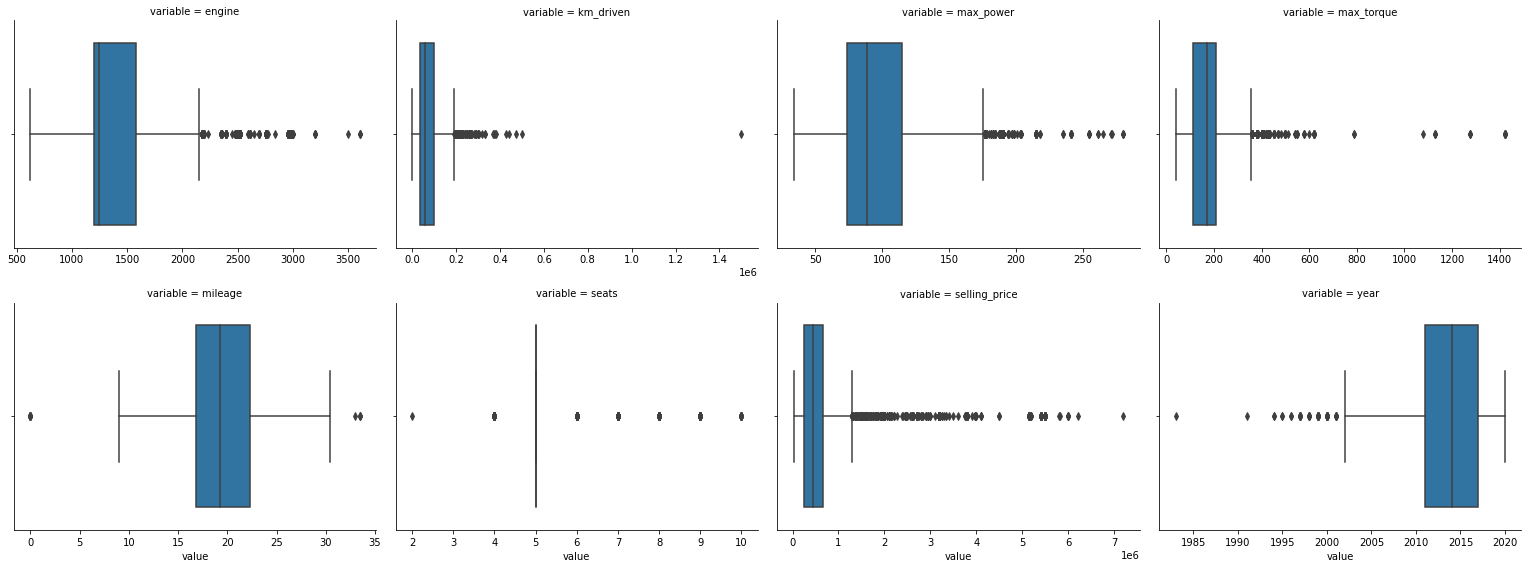

In [20]:
df_stat_melted = df_stat.select_dtypes(np.number).melt(id_vars='id')
_col_order = sorted(df_stat_melted['variable'].unique())

g = sns.FacetGrid(
    df_stat_melted, col='variable',
    col_order=_col_order, col_wrap=4,
    sharex=False, sharey=False, height=4, aspect=4/3
)
g.map(sns.boxplot, 'value', order=_col_order)

In [21]:
df_stat[['km_driven', 'max_power', 'max_torque', 'selling_price']].describe().loc[['mean', '25%', '50%', '75%', 'min', 'max']]

,km_driven,max_power,max_torque,selling_price
mean,6.987759e+04,97.559919,179.536767,6.277744e+05
25%,3.500000e+04,73.900000,111.000000,2.500000e+05
50%,6.000000e+04,88.700000,170.000000,4.500000e+05
75%,9.800000e+04,115.000000,209.000000,6.670000e+05
min,1.000000e+00,34.200000,39.226600,2.999900e+04
max,1.500000e+06,280.000000,1421.964250,7.200000e+06


A primeira vista, temos <i>outliers</i> na coluna 'max_torque', onde o maior valor é 1421, bem acima da media ou mediana.

'km_driven' também tem um <i>outliers</i>: um veículo com aproximadamente 1.5mi de quilometros rodados.

In [22]:
df_stat.sort_values('max_torque', ascending=False).head(20)

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque
4576,4577,Maruti SX4 Vxi BSIII,2009,150000,110000,Petrol,Individual,Manual,First Owner,15.00,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425
1765,1766,Maruti SX4 Vxi BSIII,2007,160000,120000,Petrol,Individual,Manual,Second Owner,15.00,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425
3368,3369,Maruti SX4 Zxi BSIII,2010,300000,50000,Petrol,Individual,Manual,First Owner,15.00,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425
893,894,Maruti SX4 Zxi BSIII,2009,200000,110000,Petrol,Individual,Manual,Third Owner,15.00,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425
1046,1047,Maruti SX4 Zxi BSIII,2010,300000,22000,Petrol,Individual,Manual,First Owner,15.00,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425
1423,1424,Maruti SX4 Zxi with Leather BSIII,2008,111000,110000,Petrol,Individual,Manual,Third Owner,15.60,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425
6,7,Maruti SX4 Zxi with Leather BSIII,2008,150000,89000,Petrol,Individual,Manual,Second Owner,15.60,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425
2821,2822,Ford Ikon 1.6 EXi NXt,2003,150000,40000,Petrol,Individual,Manual,Third Owner,14.20,1597.0,NaN,130@ 2500(kgm@ rpm),5.0,1274.86450
3441,3442,Ford Ikon 1.6 Really Sport,2003,130000,80000,Petrol,Individual,Manual,Third Owner,14.20,1597.0,NaN,130@ 2500(kgm@ rpm),5.0,1274.86450
2173,2174,Ford Ikon 1.6 Nxt,2004,100000,25000,Petrol,Individual,Manual,Third Owner,14.20,1597.0,NaN,130@ 2500(kgm@ rpm),5.0,1274.86450


Até existem veículos com 1400Nm+ de torque máximo (caminhões, tratores, etc), mas não é o caso dos veículos apresentados.

No nosso caso, o valor alto deve-se a um dado incorreto na coluna 'torque': ```145@ 4,100(kgm@ rpm)``` (correto seria 145Nm)

No pré-processamento será feito um tratamento para esses valores.

In [23]:
df_stat.sort_values('km_driven', ascending=False).head(20)

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque
4094,4095,Mahindra XUV500 W6 2WD,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.10,2179.0,140.00,330Nm@ 1600-2800rpm,7.0,330.000
1187,1188,Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII,2011,350000,500000,Diesel,Individual,Manual,Second Owner,12.99,2494.0,100.57,200Nm@ 1400-3400rpm,7.0,200.000
249,250,Mahindra Scorpio M2DI,2011,400000,475000,Diesel,Individual,Manual,Third Owner,13.50,2179.0,115.00,277.5Nm@ 1700-2200rpm,5.0,277.000
2943,2944,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,440000,Diesel,Individual,Manual,Second Owner,12.99,2494.0,100.60,200Nm@ 1400-3400rpm,7.0,200.000
2238,2239,Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV,2010,950000,426000,Diesel,Individual,Manual,First Owner,12.80,2494.0,102.00,20.4@ 1400-3400(kgm@ rpm),7.0,196.133
2732,2733,Mahindra Bolero SLE,2010,260000,380000,Diesel,Individual,Manual,Second Owner,13.60,2523.0,NaN,180 Nm at 1440-1500rpm,7.0,180.000
3500,3501,Toyota Innova 2.5 V Diesel 8-seater,2007,350000,376412,Diesel,Individual,Manual,Second Owner,12.80,2494.0,102.00,20.4@ 1400-3400(kgm@ rpm),8.0,196.133
440,441,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2011,650000,375000,Diesel,Individual,Manual,First Owner,12.80,2494.0,102.00,20.4@ 1400-3400(kgm@ rpm),8.0,196.133
384,385,Mahindra Scorpio LX,2012,450000,370000,Diesel,Individual,Manual,First Owner,12.05,2179.0,120.00,290Nm@ 1800-2800rpm,9.0,290.000
2412,2413,Hyundai Sonata 2.4 GDi MT,2012,550000,330000,Petrol,Individual,Manual,Second Owner,13.44,2359.0,198.25,250Nm@ 4250rpm,5.0,250.000


Apenas um veículo, um ```Mahindra XUV500 W6 2WD```, possui uma quilometragem de 1.500.000.

Para bater esse valor, o carro teria que andar cerca de 513km por dia, todos os dias, durante 8 anos.

Improvável para um SUV.

In [24]:
!wget https://stimg.cardekho.com/images/car-images/large/Mahindra/Mahindra-XUV500-2011-2015/4095/front-left-side-47.jpg
!mv front-left-side-47.jpg mahindra_xuv500.jpg

--2022-04-08 12:18:36--  https://stimg.cardekho.com/images/car-images/large/Mahindra/Mahindra-XUV500-2011-2015/4095/front-left-side-47.jpg
Resolving stimg.cardekho.com (stimg.cardekho.com)... 23.55.62.57, 23.55.62.40, 2600:1402:b800:43::1730:a299, ...
Connecting to stimg.cardekho.com (stimg.cardekho.com)|23.55.62.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18933 (18K) [image/jpeg]
Saving to: ‘front-left-side-47.jpg’

front-left-side-47. 100%[===================>]  18.49K  --.-KB/s    in 0s      

2022-04-08 12:18:36 (55.1 MB/s) - ‘front-left-side-47.jpg’ saved [18933/18933]



![mahindra_xuv500](mahindra_xuv500.jpg)

Novamente, esse valor será tratado no pré-processamento.

### Distribuição (histograma)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


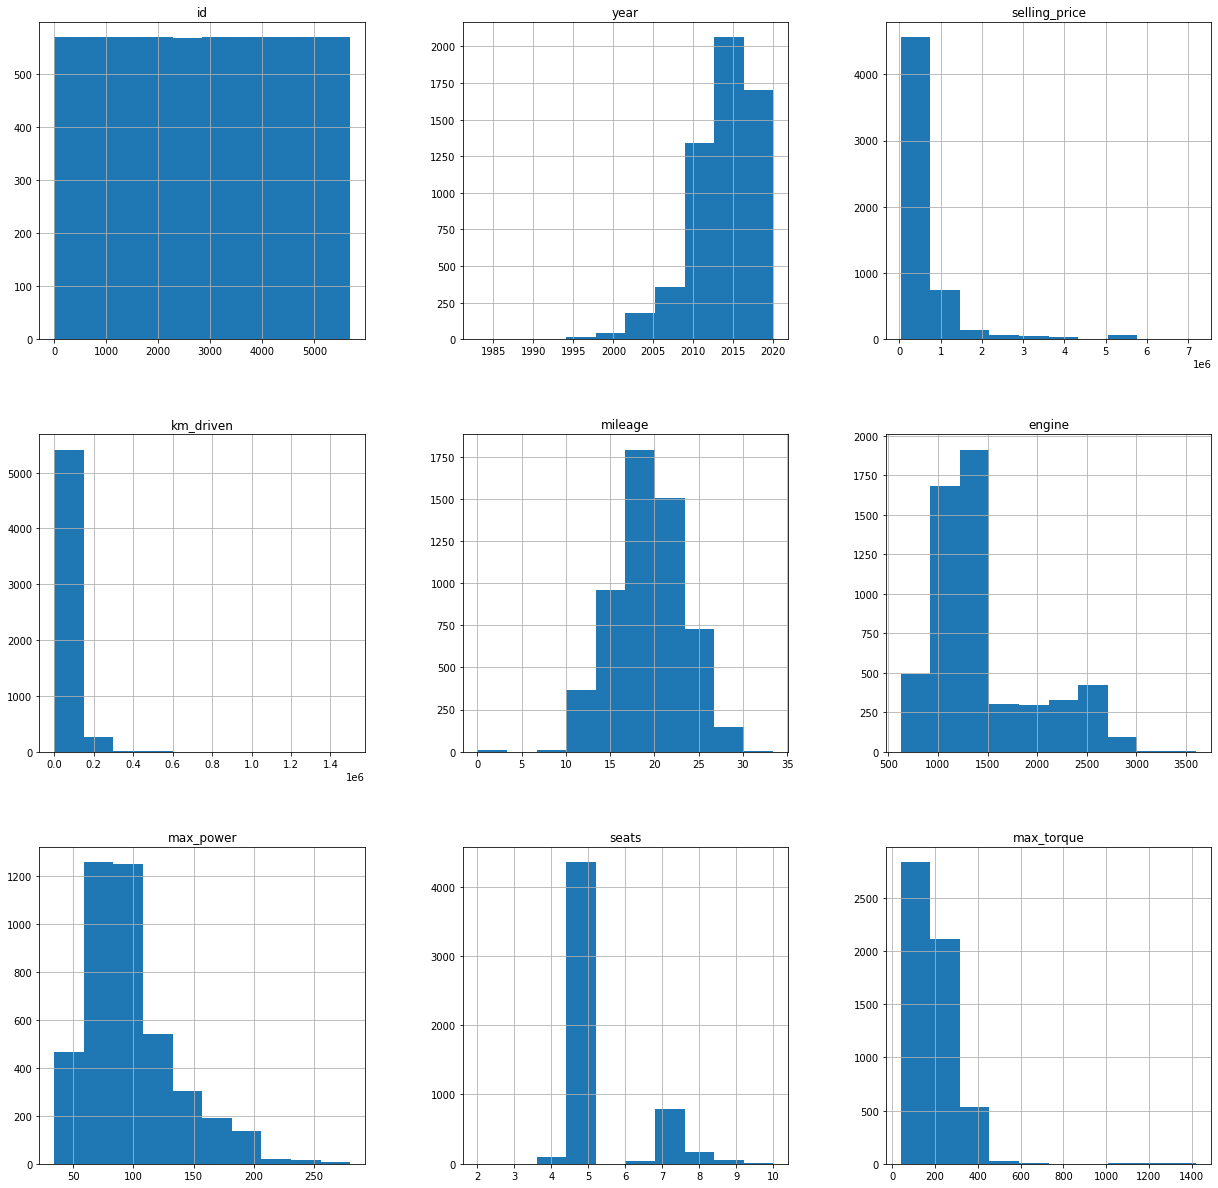

In [25]:
fig = plt.figure(figsize = (21, 21))
ax = fig.gca()

_hist = df_stat.hist(ax=ax)

---

## Explorando melhor o dataset

#### Função auxiliar

In [26]:
def make_barplot(
    data: pd.DataFrame, x: str, y: str,
    use_label_percentage: bool = False,
    use_label_num: bool = False,
    rotate_labels: int = 0
):
    if use_label_percentage and use_label_num:
        raise ValueError('use_label_percentage and use_label_num cant both be True')

    def add_percentage_labels(ax: plt.axes, feature: pd.Series, y_max: int):
        total = len(feature)
        for p in ax.patches:
            percentage = round(p.get_height() / y_max * 100, 2)
            annotation = f'{percentage}%'
            x = p.get_x() + p.get_width() / 2 - len(str(percentage)) / 24
            y = p.get_y() + p.get_height() + 100
            ax.annotate(annotation, (x, y), size = 12)
            
    def add_num_labels(ax: plt.axes, feature: pd.Series):
        total = len(feature)
        for p in ax.patches:
            num = round(p.get_height())
            annotation = f'{num}'
            x = (p.get_x() + p.get_width() / 2) - (len(str(num)) / 12)
            y = p.get_y() + p.get_height() + 100
            ax.annotate(annotation, (x, y), size = 12)
            
    ax = sns.barplot(data=data, x=x, y=y, )
    ax.set_ylim(ymax=max(data[y]) * 1.15 + 100)
    
    if rotate_labels > 0:
        plt.xticks(rotation=rotate_labels)
    
    if use_label_percentage:
        return add_percentage_labels(ax, data[x], data[y].sum())
    if use_label_num:
        return add_num_labels(ax, data[x])

### Tipo de combustível

In [27]:
df_stat['fuel'].value_counts()

Diesel    3082
Petrol    2540
CNG         41
LPG         26
Name: fuel, dtype: int64

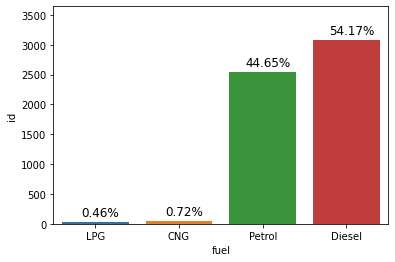

In [28]:
df_fuel_type = df_stat.groupby(['fuel']).count().reset_index().sort_values('id')
make_barplot(df_fuel_type, 'fuel', 'id', use_label_percentage=True)

Na distriuição dos tipos de combustíveis utilizados temos:
   - 54% dos carros utilizam diesel;
   - 44% gasolina;
   - 0,7% GNC e
   - 0,5% GLP.

#### Uma breve curiosidade

Carros de passeio movidos a diesel são proíbidos no Brasil desde 1976. Atualmente, apenas veículos com capacidade de carga superior a 1 tonelada ou tração 4x4 podem utilizar motores com este combustível.

No entanto, na India, local onde a maioria dos veículos apresentados no dataset é comercializado, o diesel era subsidiado pelo governo, fazendo com que este seja o combustível preferencial dos motoristas.

Em 2014, devido a mudança de políticas públicas, o diesel deixou de contar o subsidio governamental e, desde então, seu uso em carros de passeio vem caindo:

In [29]:
!wget https://static.theprint.in/wp-content/uploads/2021/10/dieselnon-diesel-1.jpg

--2022-04-08 12:18:43--  https://static.theprint.in/wp-content/uploads/2021/10/dieselnon-diesel-1.jpg
Resolving static.theprint.in (static.theprint.in)... 18.64.155.10, 18.64.155.3, 18.64.155.121, ...
Connecting to static.theprint.in (static.theprint.in)|18.64.155.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74472 (73K) [image/jpeg]
Saving to: ‘dieselnon-diesel-1.jpg’

dieselnon-diesel-1. 100%[===================>]  72.73K  --.-KB/s    in 0.01s   

2022-04-08 12:18:43 (5.02 MB/s) - ‘dieselnon-diesel-1.jpg’ saved [74472/74472]



![diesel_india](dieselnon-diesel-1.jpg)

### Tamanho do motor

In [30]:
bins = [0, 800, 1000, 1200, 1400, 1600, 2000, 3000, np.inf]
labels = ['<800', 1000, 1200, 1400, 1600, 2000, 3000, '>3000']
df_engine_size = pd.DataFrame(pd.cut(df_stat['engine'], bins, labels=labels).value_counts(sort=False)).reset_index()
df_engine_size['percentage'] = df_engine_size['engine'] / df_engine_size['engine'].sum() * 100

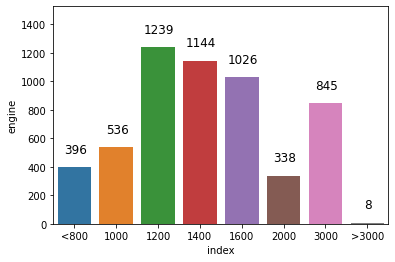

In [31]:
make_barplot(df_engine_size, 'index', 'engine', use_label_num=True)

In [32]:
df_engine_size

,index,engine,percentage
0,<800,396,7.158351
1,1000,536,9.689082
2,1200,1239,22.396963
3,1400,1144,20.679682
4,1600,1026,18.546638
5,2000,338,6.109906
6,3000,845,15.274765
7,>3000,8,0.144613


A maior parte ```(61%)``` dos veículos possui um motor entre ```1000CC``` e ```1600CC```

Outra faixa notável é a ```1600CC - 3000CC```, com ```21%``` dos veículos.

Os motores até ```1000CC``` correspondem a ```7%``` do total.

Motores maiores que ```3000CC``` são apenas ```0.14%```.

### Quantidade de lugares

In [33]:
df_seats = pd.DataFrame(df_stat.groupby(['seats'])['id'].count()).reset_index()

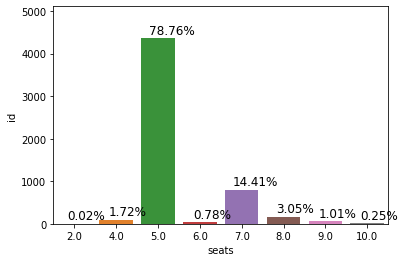

In [34]:
make_barplot(df_seats, 'seats', 'id', use_label_percentage=True)

Sem muitas surpressas aqui:
   - A maior parte ```(78%)``` possui 5 assentos
   - A segunda maior categoria é a de 7 lugares ```(14%)```, composta principalmente por SUVs.
   
Esta é uma informação que, como vimos antes, não tem muito impacto no preço de venda do veículo.

### Marcas

In [35]:
# https://adjusttext.readthedocs.io/en/latest/
!pip install adjustText
from adjustText import adjust_text

  Preparing metadata (setup.py) ... - done
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=52eac5499d86e19e0407d80b755d8da9a3da65013370802451f10e7fe4acecf8
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [36]:
df_stat['brand'] = df_stat['name'].str.split().str[0]

In [37]:
df_brands = pd.DataFrame(df_stat.groupby(['brand'])['id'].count())
df_brands['mean_price'] = df_stat.groupby(['brand'])['selling_price'].mean()
df_brands['median_price'] = df_stat.groupby(['brand'])['selling_price'].median()

df_brands.sort_values('id')

,id,mean_price,median_price
brand,,,
Ambassador,1,9.900000e+04,99000.0
Ashok,1,3.000000e+05,300000.0
Isuzu,2,1.975000e+06,1975000.0
MG,3,1.783333e+06,1750000.0
Daewoo,3,7.700000e+04,86000.0
Kia,3,1.372667e+06,1575000.0
Land,4,3.162500e+06,3250000.0
Force,5,9.540000e+05,910000.0
Mitsubishi,9,8.911111e+05,950000.0


In [38]:
pprint_series(df_brands['id'])

col                    dtype            col                    dtype            col                    dtype            col                    dtype            col                    dtype

Maruti                 1705	|	Hyundai                996	|	Mahindra               547	|	Tata                   515	|	Toyota                 350
Honda                  324	|	Ford                   278	|	Chevrolet              169	|	Renault                164	|	Volkswagen             129
BMW                    82	|	Skoda                  71	|	Nissan                 53	|	Jaguar                 52	|	Datsun                 46
Volvo                  43	|	Mercedes-Benz          33	|	Fiat                   30	|	Audi                   29	|	Jeep                   23
Lexus                  19	|	Mitsubishi             9	|	Force                  5	|	Land                   4	|	Kia                    3
MG                     3	|	Daewoo                 3	|	Isuzu                  2	|	Ashok                  1	|	Ambas

As marcas com mais registros, e possivelmente, mais vendidas são:
   - Maruti;
   - Hyundai;
   - Mahindra e
   - Tata
   
É interessante notar que, dessas 4, 3 tem origens indianas (```Hyundai``` é a exceção) e apenas a ```Maruti``` não é mais controlada por eles, sendo vendida pelo governo indiano em 2003.

In [39]:
df_brands.corr()['mean_price']

id             -0.287711
mean_price      1.000000
median_price    0.985268
Name: mean_price, dtype: float64

E como é de se esperar, quanto mais registros de uma marca menor é o preço médio dos veículos, já que carros populares vendem mais e custam menos (na teoria).

<AxesSubplot:xlabel='id', ylabel='mean_price'>

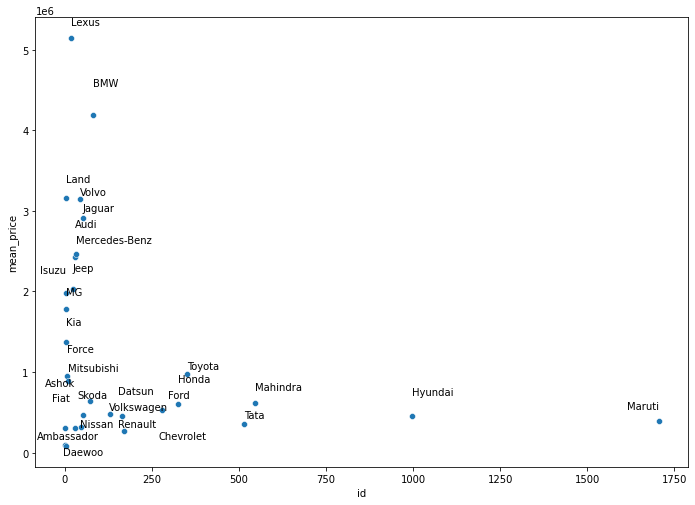

In [40]:
def make_scatterplot(
    data: pd.DataFrame, x: str, y: str, hue: str = None,
    use_cat_label: bool = False, cat_label: str = None
):
    if use_cat_label and not cat_label:
        raise ValueError('if use_cat_label is True, then cat_label is required')
    
#     def add_labels(data: pd.DataFrame, x: str, y: str, label_col: str, ax: plt.axes):
#         for line in range(0, data.shape[0]):
#              ax.text(
#                  data[x][line] + 0.01, data[y][line], data[label_col][line],
#                  horizontalalignment='left', size='medium', color='black', # weight='semibold'
#              )  

    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    plot = sns.scatterplot(ax=ax, data=data, x=x, y=y, hue=hue)

    if use_cat_label:
#         return add_labels(data, x, y, cat_label, ax)
        texts = []
        for x, y, s in zip(data[x].values, data[y].values, data[cat_label].values):
            texts.append(plt.text(x, y, s))
            adjust_text(
                texts, only_move={'points':'y', 'texts':'xy'}, ax=ax
#                 arrowprops=dict(arrowstyle="->", color='r', lw=0.5)
            )

        return ax
    
    return ax

make_scatterplot(df_brands.reset_index(), x='id', y='mean_price', use_cat_label=True, cat_label='brand')

### Quilometragem

In [41]:
bins = [0, 15_000, 30_000, 70_000, 100_000, 150_000, 300_000, 500_000, np.inf]
labels = ['< 15k', '30k', '70k', '100k', '150k', '300k', '500k', '> 500k']
df_km_driven = pd.DataFrame(pd.cut(df_stat['km_driven'], bins, labels=labels).value_counts(sort=False)).reset_index()
df_km_driven['percentage'] = df_km_driven['km_driven'] / df_km_driven['km_driven'].sum() * 100

df_km_driven

,index,km_driven,percentage
0,< 15k,572,10.054491
1,30k,717,12.603269
2,70k,2096,36.843030
3,100k,1135,19.950782
4,150k,893,15.696959
5,300k,263,4.622957
6,500k,12,0.210933
7,> 500k,1,0.017578


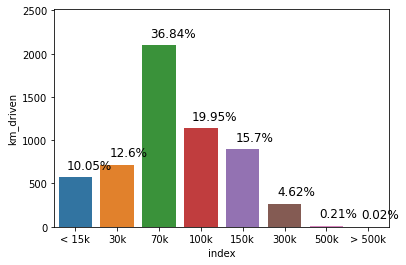

In [42]:
make_barplot(data=df_km_driven, x='index', y='km_driven', use_label_percentage=True)

   - ```37%``` dos veículos possuem entre 30 e 70 mil km rodados;
   - ```35,6%``` estão entre 70 e 150 mil;
   - Apenas ```4,8%``` possuem acima de de 150 mil km e
   - ```10%``` são 'semi-novos', com menos de 15 mil km rodados.

### Torque

In [43]:
df_stat.sort_values('max_torque', ascending=False)

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque,brand
4576,4577,Maruti SX4 Vxi BSIII,2009,150000,110000,Petrol,Individual,Manual,First Owner,15.0,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425,Maruti
1765,1766,Maruti SX4 Vxi BSIII,2007,160000,120000,Petrol,Individual,Manual,Second Owner,15.0,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425,Maruti
3368,3369,Maruti SX4 Zxi BSIII,2010,300000,50000,Petrol,Individual,Manual,First Owner,15.0,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425,Maruti
893,894,Maruti SX4 Zxi BSIII,2009,200000,110000,Petrol,Individual,Manual,Third Owner,15.0,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425,Maruti
1046,1047,Maruti SX4 Zxi BSIII,2010,300000,22000,Petrol,Individual,Manual,First Owner,15.0,1586.0,104.68,"145@ 4,100(kgm@ rpm)",5.0,1421.96425,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,5487,Hyundai Santro Xing XL eRLX Euro II,2006,105000,60000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN,NaN,Hyundai
5515,5516,Maruti Omni LPG STD BSIV,1999,70000,100000,LPG,Individual,Manual,Fourth & Above Owner,NaN,NaN,NaN,NaN,NaN,NaN,Maruti
5572,5573,Hyundai Santro Xing XL,2007,90000,64000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN,Hyundai
5611,5612,Hyundai Santro GLS I - Euro II,2007,150000,60000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN,NaN,Hyundai


In [44]:
bins = [0, 50, 75, 100, 125, 150, 200, 250, 300, np.inf]
labels = ['< 50', '75', '100', '125', '150', '200', '250', '300', ' > 300']
df_max_torque = pd.DataFrame(pd.cut(df_stat['max_torque'], bins, labels=labels).value_counts(sort=False)).reset_index()
df_max_torque['percentage'] = df_max_torque['max_torque'] / df_max_torque['max_torque'].sum() * 100

df_max_torque

,index,max_torque,percentage
0,< 50,7,0.126559
1,75,485,8.768758
2,100,594,10.739468
3,125,1016,18.369192
4,150,404,7.304285
5,200,1542,27.879226
6,250,621,11.227626
7,300,273,4.935816
8,> 300,589,10.649069


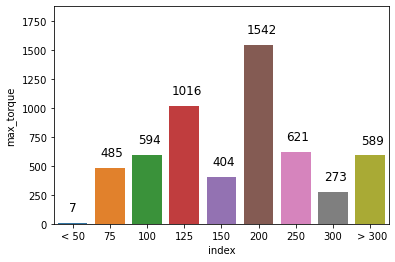

In [45]:
make_barplot(df_max_torque, x='index', y='max_torque', use_label_num=True)

Os valores de torque máximo estão bem distribuídos, com a maior categoria sendo ```150~200Nm```, com ```27,8%``` dos veículos.

Também é interessante notar que os valores acima de ```300Nm``` incluem <i>outliers</i> causados por erros de entrada.

### Potência

In [46]:
df_stat.sort_values('max_power', ascending=False)

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque,brand
3577,3578,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604.0,280.0,347Nm@ 4300rpm,5.0,347.0,Jeep
788,789,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604.0,280.0,347Nm@ 4300rpm,5.0,347.0,Jeep
1280,1281,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604.0,280.0,347Nm@ 4300rpm,5.0,347.0,Jeep
484,485,Mercedes-Benz E-Class E350 Petrol,2009,1000000,80000,Petrol,Individual,Automatic,Third Owner,10.93,3498.0,272.0,355Nm@ 4500rpm,5.0,355.0,Mercedes-Benz
2209,2210,Jaguar XF 3.0 Litre S Premium Luxury,2014,2000000,51000,Diesel,Individual,Automatic,First Owner,14.74,2993.0,270.9,600Nm@ 2000rpm,5.0,600.0,Jaguar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5666,5667,Mahindra Scorpio EX,2014,650000,50000,Diesel,Individual,Manual,First Owner,14.00,2523.0,NaN,200Nm@ 1400-2200rpm,8.0,200.0,Mahindra
5670,5671,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN,Tata
5679,5680,Tata Indigo CS LX (TDI) BS III,2012,150000,150000,Diesel,Individual,Manual,Third Owner,19.09,1396.0,NaN,135Nm@ 2500rpm,5.0,135.0,Tata
5681,5682,Maruti 800 AC BSII,2004,55000,50000,Petrol,Individual,Manual,Third Owner,16.10,796.0,NaN,59Nm@ 2500rpm,4.0,59.0,Maruti


In [47]:
bins = [0, 50, 75, 100, 125, 150, 200, 250, np.inf]
labels = ['< 50', '75', '100', '125', '150', '200', '250', ' > 250']
df_max_power = pd.DataFrame(pd.cut(df_stat['max_power'], bins, labels=labels).value_counts(sort=False)).reset_index()
df_max_power['percentage'] = df_max_power['max_power'] / df_max_power['max_power'].sum() * 100

df_max_power

,index,max_power,percentage
0,< 50,254,6.049059
1,75,993,23.648488
2,100,1452,34.579662
3,125,701,16.694451
4,150,398,9.478447
5,200,350,8.335318
6,250,38,0.904977
7,> 250,13,0.309598


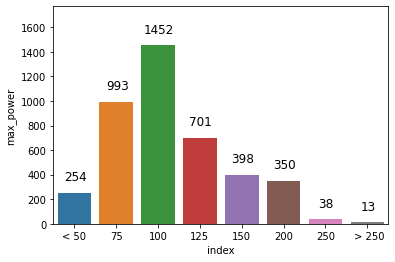

In [48]:
make_barplot(df_max_power, x='index', y='max_power', use_label_num=True)

Diferentemente do torque máximo, a potência máxima encontra-se bem concentrada na faixa de ```50~100bhp```, com ```58%``` dos veículos nesta faixa.

Apenas ```9,5%``` possui potência acima de ```150bhp```.

#### Correlação com preço 

In [49]:
df_max_power_corr = df_stat.loc[:, ['max_power', 'selling_price', 'fuel']]
df_max_power_corr.dropna(inplace=True)

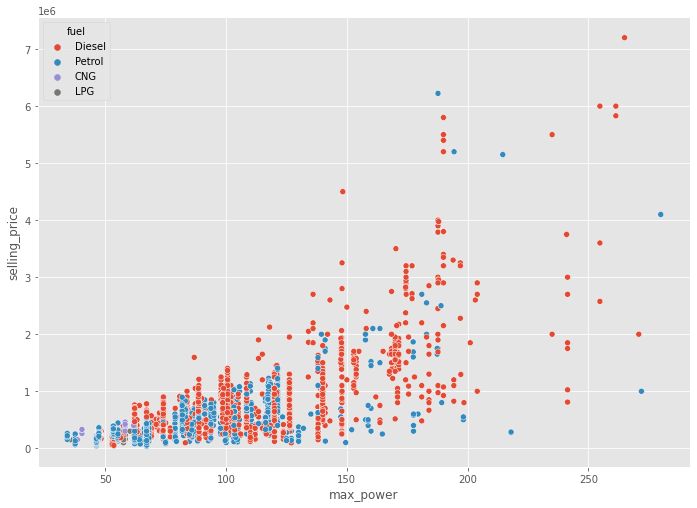

In [50]:
with plt.style.context('ggplot'):
    make_scatterplot(df_max_power_corr, x='max_power', y='selling_price', hue='fuel')

### Preço

In [51]:
df_stat.sort_values('selling_price', ascending=False)

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque,brand
896,897,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38,2993.0,265.00,620Nm@ 1500-2500rpm,7.0,620.0,BMW
1240,1241,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,320Nm@ 1400-4100rpm,5.0,320.0,Audi
3454,3455,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79,620Nm@ 1600-2400rpm,5.0,620.0,Mercedes-Benz
2823,2824,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,261.40,620Nm@ 2000-2500rpm,4.0,620.0,BMW
5658,5659,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79,620Nm@ 1600-2400rpm,5.0,620.0,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,2411,Maruti 800 AC,1998,35000,40000,Petrol,Individual,Manual,Second Owner,16.10,796.0,NaN,59Nm@ 2500rpm,4.0,59.0,Maruti
3889,3890,Maruti Wagon R VXI,2004,33351,90000,Petrol,Individual,Manual,Third Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,90.0,Maruti
5398,5399,Maruti 800 Std,2004,31504,110000,Petrol,Individual,Manual,Third Owner,16.10,796.0,NaN,59Nm@ 2500rpm,4.0,59.0,Maruti
5333,5334,Hyundai Santro GLS I - Euro I,2000,30000,90000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN,NaN,Hyundai


In [52]:
bins = [0, 100_000, 200_000, 350_000, 500_000, 1_000_000, 2_500_000, np.inf]
labels = ['< 100k', '200k', '350k', '500k', '1000k', '2500k', ' > 2500k']
df_selling_price = pd.DataFrame(pd.cut(df_stat['selling_price'], bins, labels=labels).value_counts(sort=False)).reset_index()
df_selling_price['percentage'] = df_selling_price['selling_price'] / df_selling_price['selling_price'].sum() * 100

df_selling_price

,index,selling_price,percentage
0,< 100k,267,4.693268
1,200k,722,12.691158
2,350k,1264,22.218316
3,500k,1033,18.157848
4,1000k,1840,32.343118
5,2500k,360,6.328001
6,> 2500k,203,3.568290


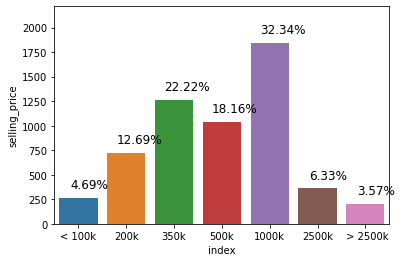

In [53]:
make_barplot(df_selling_price, x='index', y='selling_price', use_label_percentage=True)

Assumimos aqui que os preços estão em ```rupias indianas```.

Os preços apresentados estão bem divididos:
   - ```12%``` entre 100k e 200k;
   - ```22%``` entre 200k e 350k;
   - ```32%``` entre 500k e 1000k e
   - ```10%``` acima de 1000k, representando o segmento 'premium'

## Considerações finais

O <i>dataset</i> apresentado contém dados ```categóricos``` (marcas, modelos) e ```numéricos``` (quilometragem, potencia, etc). Alguns dos dados numéricos estão em formato de texto (torque, economia de combustivel), necessitando de ```conversão``` e ```tratamento``` apropriado para análise.

Existem dados nulos em colunas numéricas, sendo necessário definir qual procedimento será utilizado para pré-processamento, ```exclusão``` ou ```substituição pela média```, por exemplo.

Também será necessário tratar <i>```outliers```</i>, preferencialmente com métodos automatizados como ```MCD (Minimum Covariance Determinant)``` ou ```(LOF) Local Outlier Factor```.

<i>```Scaling```</i> e outras técnicas de ```normalização``` também serão necessárias, a depender do modelo utilizado para predição.

No geral, tá bem completinho e dá pra brincar.